In [106]:
#https://feature.undp.org/covid-19-and-the-sdgs/
#https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
import pandas as pd

In [128]:
# Read the data
covid_df = pd.read_csv('owid-covid-data.csv')
co2_df = pd.read_csv('owid-co2-data.csv')

In [129]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293543 entries, 0 to 293542
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    293543 non-null  object 
 1   continent                                   279596 non-null  object 
 2   location                                    293543 non-null  object 
 3   date                                        293543 non-null  object 
 4   total_cases                                 257985 non-null  float64
 5   new_cases                                   285216 non-null  float64
 6   new_cases_smoothed                          283952 non-null  float64
 7   total_deaths                                237667 non-null  float64
 8   new_deaths                                  285288 non-null  float64
 9   new_deaths_smoothed                         284058 non-null  float64
 

In [130]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [131]:
def get_country_covid(country_name):
    country_df = covid_df[covid_df['location'] == country_name]
    country_df = country_df[['date', 'total_cases', 'total_deaths', 'total_tests', 'new_cases', 'new_deaths', 'new_tests']]
    country_df = country_df.set_index('date')
    country_df.index = pd.to_datetime(country_df.index)
    return country_df

def get_country_co2(country_name):
    country_df = co2_df[co2_df['country'] == country_name]
    country_df = country_df[['year', 'co2']]
    country_df = country_df.set_index('year')
    country_df.index = pd.to_datetime(country_df.index)
    return country_df


    
    

<small>COVID-19 data:
    
*Daily new confirmed cases:* This feature represents the number of new cases of COVID-19 reported each day, which could be a proxy for the severity of the pandemic in a given location.

*Daily new deaths:* This feature represents the number of new deaths due to COVID-19 reported each day, which could be a proxy for the impact of the pandemic on a given location.

*Total confirmed cases:* This feature represents the total number of confirmed cases of COVID-19 in a given location, which could be a proxy for the overall severity of the pandemic in that location.

*Total deaths:* This feature represents the total number of deaths due to COVID-19 in a given location, which could be a proxy for the overall impact of the pandemic in that location.


CO2 emissions data:

*Total CO2 emissions:* This feature represents the total amount of CO2 emissions in a given location, which could be the target variable of your model.

*CO2 emissions per capita:* This feature represents the amount of CO2 emissions per person in a given location, which could be another target variable of your model.<small/>


In [132]:
co2_df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [133]:
usa_df = get_country_covid('United States')
usa_df

usa_co2_df = get_country_co2('United States')
usa_co2_df

usa_df['co2'] = usa_co2_df['co2']
usa_df
    

,total_cases,total_deaths,total_tests,new_cases,new_deaths,new_tests,co2
date,,,,,,,
2020-01-03,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-04,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-05,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-06,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-07,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2023-03-05,102247392.0,1111342.0,NaN,NaN,NaN,NaN,NaN
2023-03-06,102247392.0,1111342.0,NaN,NaN,NaN,NaN,NaN
2023-03-07,102247392.0,1111342.0,NaN,NaN,NaN,NaN,NaN


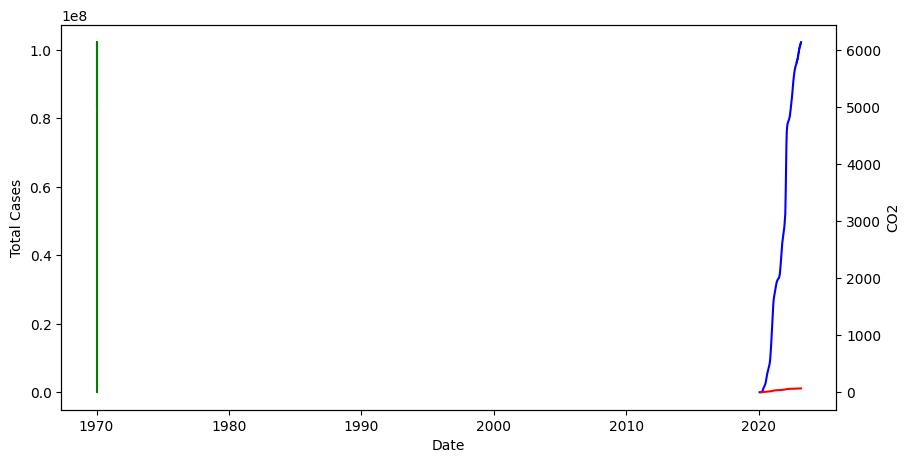